In [1]:
!which python


/Users/saiha/opt/anaconda3/envs/churn-model/bin/python


In [2]:
%load_ext autoreload
%autoreload 2

In [26]:
#standard imports
import os
import pickle
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
import sklearn

from src.localpath import *
from src.data.make_dataset import load_training_data
from src.models.train_model import *

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
AdaBoostClassifier,
GradientBoostingClassifier,
RandomForestClassifier,


)
from sklearn.inspection import plot_partial_dependence

In [4]:
#Configuration for Jupyter Notebooks
pd.options.display.max_columns=100
pd.options.display.max_rows=100

## Load Featurized  Data

In [5]:
X_train,y_train=load_training_data(final=True)

In [6]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,25.30,25.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,1,75.15,525.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,1,20.05,85.50,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,76.00,2215.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,75.10,270.70,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Train Models

In [11]:
models_to_train= [
    DecisionTreeClassifier,
    AdaBoostClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier
]

In [12]:
for model_class in models_to_train:
    print(model_class.__name__)
    model=model_class()
    store_model_and_results(model,X_train,y_train)
    print_model_results(model,X_train,y_train)

DecisionTreeClassifier
fitting model before pickling
Saving model to 2063055419843484160.pkl
writing model results to existing results csv file
accuracy:0.73
precision:0.49
recall:0.49
f1:0.49
roc_auc:0.65
AdaBoostClassifier
fitting model before pickling


/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saving model to 277040488415911936.pkl
writing model results to existing results csv file
accuracy:0.80
precision:0.65
recall:0.52
f1:0.57
roc_auc:0.84
RandomForestClassifier
fitting model before pickling


../src/models/train_model.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Saving model to 1676993436399764224.pkl
writing model results to existing results csv file
accuracy:0.79
precision:0.63
recall:0.48
f1:0.54
roc_auc:0.82
GradientBoostingClassifier
fitting model before pickling


/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saving model to 733971098478235904.pkl
writing model results to existing results csv file
accuracy:0.80
precision:0.66
recall:0.51
f1:0.57
roc_auc:0.84


# Load model results

In [13]:
model_results=load_model_results()

In [15]:
model_results.sort_values(by="roc_auc",ascending = False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
5,733971098478235904.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.801397,0.660908,0.505755,0.572014,0.842236
1,1114131105140966656.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.801966,0.653366,0.529496,0.584391,0.840393
3,277040488415911936.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.651982,0.515108,0.574920,0.837240
4,1676993436399764224.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.788712,0.631952,0.481295,0.544072,0.824517
2,2063055419843484160.pkl,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.731163,0.495610,0.492806,0.492959,0.654802
0,964380814332921088.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.795609,NaN,NaN,NaN,NaN


# GradientBoostingClassifier 

In [16]:
model=load_pickled_model('733971098478235904.pkl')

In [23]:
most_important_features=sorted(zip(X_train.columns,model.feature_importances_),key= lambda x:x[1],reverse=True)
most_important_features[:10]

[('tenure', 0.3190619749721704),
 ('InternetService_Fiber optic', 0.197919666335489),
 ('PaymentMethod_Electronic check', 0.08877792308614153),
 ('Contract_Two year', 0.07808903622999477),
 ('MonthlyCharges', 0.07112720095631254),
 ('TotalCharges', 0.06725405269709599),
 ('Contract_One year', 0.05840128163304474),
 ('OnlineSecurity_Yes', 0.02132682999183937),
 ('PaperlessBilling', 0.01630280048031175),
 ('OnlineBackup_No internet service', 0.014209252613414117)]

# look at partital dependence plots
we are going to look at these plots to determine the direction of influence of each of these features

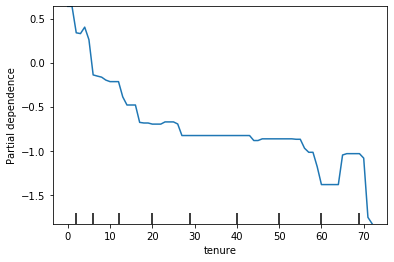

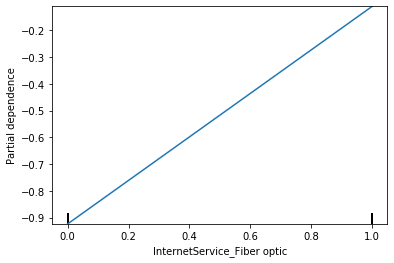

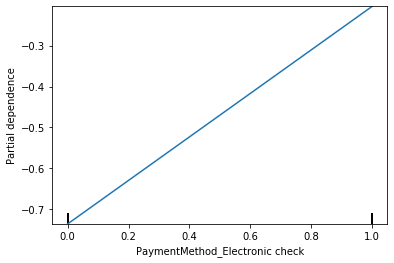

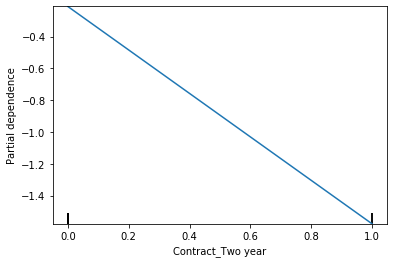

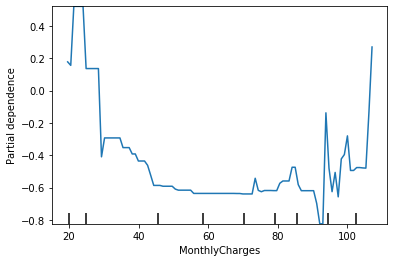

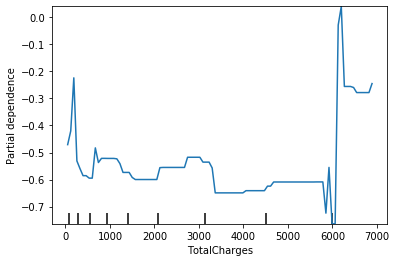

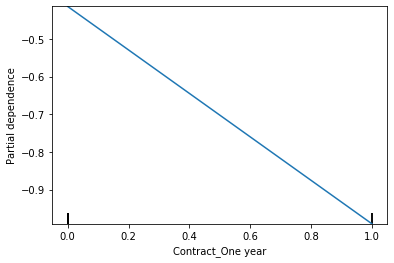

In [25]:
for col, _ in most_important_features[:7]:
    plot_partial_dependence(model,X_train,[col])

# Visualise model trtaining
In this section, we are going to use **learning curves** to visualise the training models to explore overfitting and underfitting

# Learning Curves

In [29]:
train_sizes,train_scores,test_scores=learning_curve(model,X_train,y_train)


/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/saiha/opt/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A 

In [30]:
train_sizes

array([ 422, 1373, 2323, 3274, 4225])

In [36]:
train_scores=np.mean(train_scores,axis=1)

In [37]:
test_scores=np.mean(test_scores,axis=1)

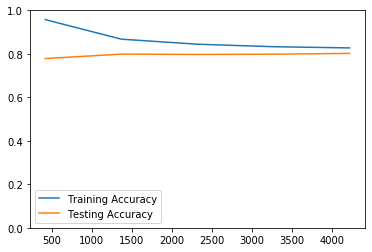

In [42]:
plt.plot(train_sizes,train_scores,label='Training Accuracy')
plt.plot(train_sizes,test_scores,label="Testing Accuracy")
plt.ylim(0,1)
_=plt.legend()


# Inspect a classic case of overfitting

In [43]:
dt=load_pickled_model("2063055419843484160.pkl")

In [44]:
train_sizes,train_scores,test_scores=learning_curve(dt,X_train,y_train)
train_scores=np.mean(train_scores,axis=1)
test_scores=np.mean(test_scores,axis=1)

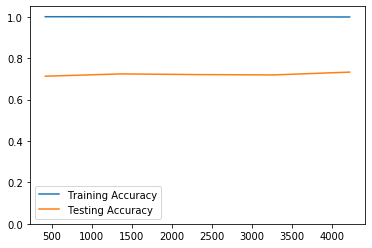

In [46]:
plt.plot(train_sizes,train_scores,label='Training Accuracy')
plt.plot(train_sizes,test_scores,label="Testing Accuracy")
plt.ylim(0,1.05)
_=plt.legend()
